# Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

train = pd.read_csv('bike-sharing-demand/train.csv')

datetime - hourly date + timestamp      
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter      
holiday - whether the day is considered a holiday     
workingday - whether the day is neither a weekend nor holiday     
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy      
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist     
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog      
temp - temperature in Celsius     
atemp - "feels like" temperature in Celsius      
humidity - relative humidity      
windspeed - wind speed     
casual - number of non-registered user rentals initiated      
registered - number of registered user rentals initiated      
count - number of total rentals    

In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.shape

(10886, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train['datetime'] = train['datetime'].astype('datetime64[ns]')
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
train.datetime.dt.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64

In [7]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second

train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


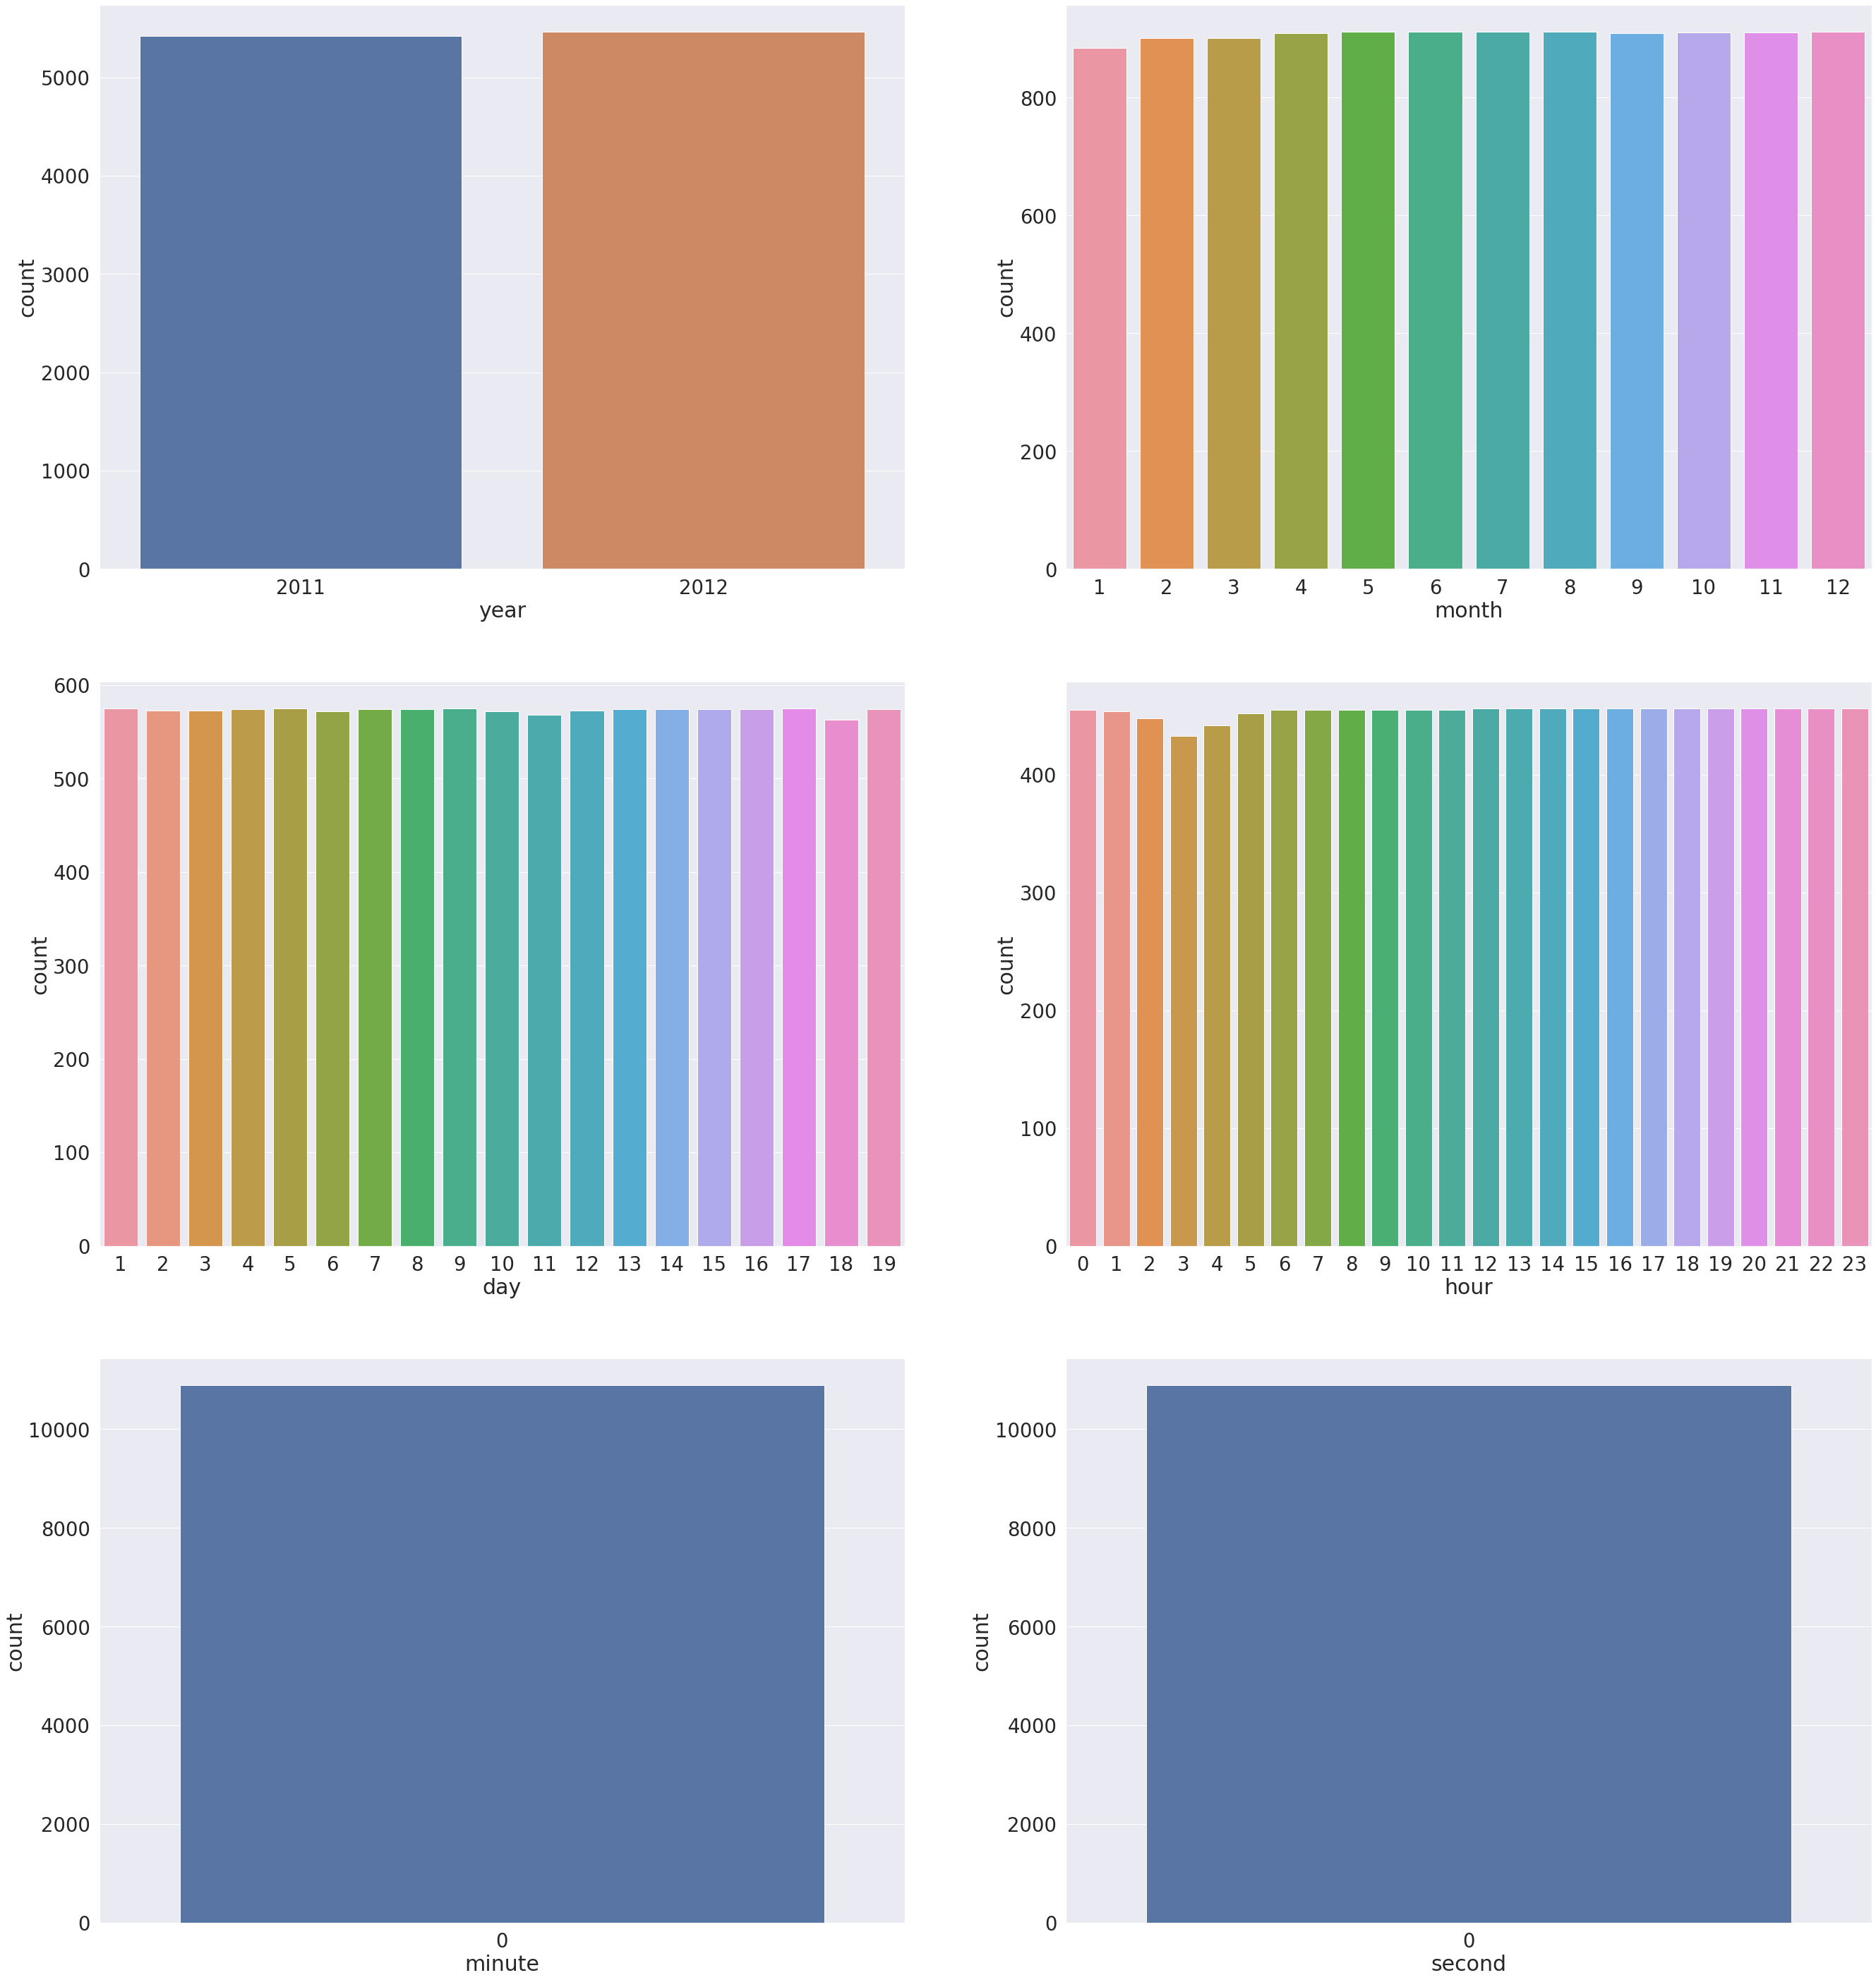

In [8]:
f,ax=plt.subplots(3, 2, figsize=(45,50))
sns.countplot('year', data=train, ax=ax[0,0])
sns.countplot('month', data=train, ax=ax[0,1])
sns.countplot('day', data=train, ax=ax[1,0])
sns.countplot('hour', data=train, ax=ax[1,1])
sns.countplot('minute' , data=train, ax=ax[2,0])
sns.countplot('second' , data=train, ax=ax[2,1])
plt.show()

In [9]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [10]:
print(len(train.columns))
print(train.columns)

18
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [11]:
features = ['season', 'holiday', 'workingday', 'weather','temp', 'atemp',
            'humidity', 'windspeed','casual', 'registered','year', 'month', 'day', 'hour']
len(features)

14

In [12]:
target = 'count'
target

'count'

In [13]:
X = train[features]
print(X.shape)
X.head()

(10886, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4


In [14]:
y = train[target]
print(y.shape)
y.value_counts()
#train['windspeed'].value_counts()

(10886,)


5      169
4      149
3      144
6      135
2      132
      ... 
667      1
603      1
587      1
970      1
843      1
Name: count, Length: 822, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

predictions

array([306., 232., 115., ..., 795.,  71., 209.])

In [17]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [18]:
rmse = RMSE(y_test,predictions)
rmse

3.0770042704657583e-13

In [19]:
mse = MSE(y_test,predictions)
mse

9.467955280464515e-26

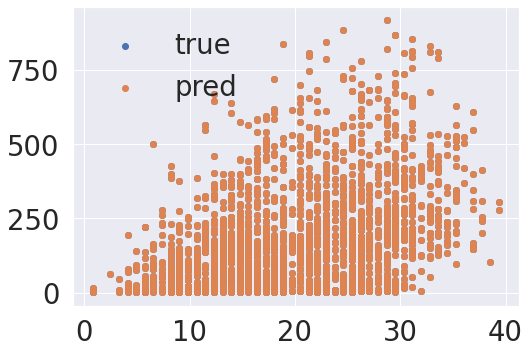

In [20]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.legend()
plt.show()

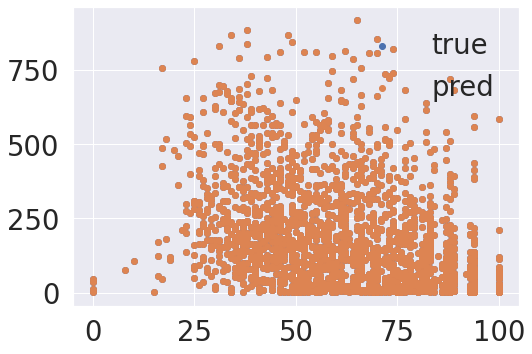

In [21]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()
plt.show()

# 마치며
이번 E5 에서는 데이터 전처리에 대해 간단하게 시도해보면서 선형 회귀에 대해서 정확하게 배워가는 시간이었던 것 같다

이번 모델은 데이터셋이 워낙 좋아서 예측이 잘 된 것 같다.